In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from astropy.io import ascii

## Define a numerical method to solve a y' = f(y, x) differential equation

In [2]:
def ForwardEuler(f, U0, T, n, *args):
    """Solve u'=f(u,t), u(0)=U0, with n steps until t=T."""
    t = np.zeros(n+1)
    u = np.zeros(n+1)  # u[k] is the solution at time t[k]
    u[0] = U0
    t[0] = 0.01 * 86400
    dt = (T/float(n))
    for k in range(n):
        t[k+1] = t[k] + dt
        u[k+1] = u[k] + dt*f(u[k], t[k], *args)
    return u, t

## Define various luminosities that go into solving the differential equation in Problem 1.
## (Also refer to slide 45 of Masaomi's lecture)

In [3]:
def a_func(k, Mej, vej):
    #Mej = Mej * 2e33
    #vej = vej * 3e10
    c = 3e10
    return (3 / (4 * c * np.pi)) * k * Mej / vej

def LKN(Eint, t, k, Mej, vej):
    a = a_func(k, Mej, vej)
    return t * Eint / a

def Ldecay(t, Mej, alpha, b):
    t = t / 86400
    return Mej * b * t**(-alpha)

k = 0.1
Mej = 0.03 * 2e33
vej = 0.2 * 3e10
alpha = 1.3
fdep = 0.5
b = 2e10

def model(Eint, t, k, Mej, vej, alpha, fdep, b):

    lkn = LKN(Eint, t, k, Mej, vej)
    ldecay = Ldecay(t, Mej, alpha, b)    
    dEintdt = -lkn - Eint/t + fdep * ldecay 
    
    return dEintdt

Eint_1, t = ForwardEuler(model, 0, 30 * 86400, 3000, k, Mej, vej, alpha, fdep, b)
Eint_10, t = ForwardEuler(model, 0, 30 * 86400, 3000, k*10, Mej, vej, alpha, fdep, b)

## Download data to compare model with observed data

In [4]:
data_lc = ascii.read("./GW170817_Lbol.dat")
print data_lc

col1   col2     col3    col4    col5    col6 col7  col8
---- -------- ------- ------- -------- ----- ---- -----
 0.5 7.82e+41 1.2e+42 9.6e+40  2.9e+40  2613   -- 21908
 0.6 8.45e+41 1.3e+42 1.4e+41    2e+41  2079   -- 21908
 0.8 7.31e+41   7e+41 3.4e+40  1.8e+40  2254   -- 21908
 1.0 6.15e+41 5.5e+41 6.8e+39  2.8e+40  2254   -- 21908
 1.2 4.97e+41 4.8e+41 2.3e+40  5.8e+37  2613   -- 21908
 1.5 3.69e+41 3.6e+41 2.6e+37  1.8e+40  3560   -- 21908
 2.5 2.44e+41 2.3e+41 5.5e+39  8.5e+39  3560   -- 21908
 3.5 1.87e+41 1.7e+41 8.3e+39  6.5e+39  3560   -- 21908
 4.5 1.46e+41 1.4e+41 8.1e+39  8.6e+39  4473   -- 21908
 5.5 1.16e+41   1e+41 8.6e+39  9.4e+39  3351   -- 21908
 6.5 8.84e+40 9.1e+40 5.5e+39  5.8e+39  4473   -- 21908
 7.5 6.53e+40   7e+40 6.6e+39  6.4e+39  4473   -- 21908
 8.5 4.69e+40 4.5e+40 6.7e+39  8.5e+39  4755   -- 21908
 9.5 3.36e+40 2.9e+40 4.9e+39  6.4e+39  4755   -- 21908
10.5 2.47e+40   2e+40 4.2e+39    5e+39  4755   -- 21908
11.5 1.96e+40   3e+40 7.5e+39    1e+40  4755   -

## Plot and Compare

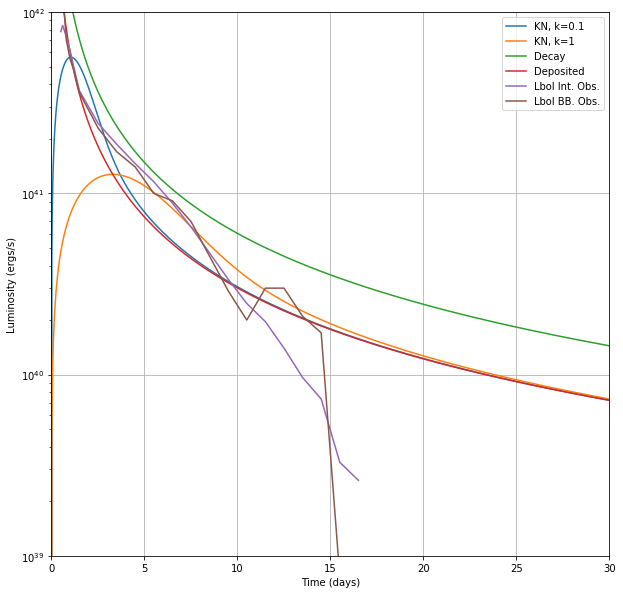

In [5]:
plt.figure(figsize=(10,10))
plt.plot(t/86400, LKN(Eint_1, t, k, Mej, vej), label="KN, k=0.1")
plt.plot(t/86400, LKN(Eint_10, t, k*10, Mej, vej), label="KN, k=1")
plt.plot(t/86400, Ldecay(t, Mej, alpha, b), label="Decay")
plt.plot(t/86400, fdep*Ldecay(t, Mej, alpha, b), label="Deposited")
plt.plot(data_lc['col1'], data_lc['col2'], label="Lbol Int. Obs.")
plt.plot(data_lc['col1'], data_lc['col3'], label="Lbol BB. Obs.")
plt.xlim(xmin=0.01)
plt.grid()
plt.xlabel("Time (days)")
plt.ylabel("Luminosity (ergs/s)")
plt.legend(loc=1)
plt.semilogy()
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=1e39, ymax=1e42)
plt.show()